In [76]:
import numpy as np
from numpy.random import default_rng


def generate_noisy_sine(x_min, x_max, num_x):
    rng = default_rng(0)
    x_train = [[rng.uniform(x_min, x_max)] for _ in range(num_x)]
    y_train = [np.sin(np.pi * x[0]) for x in x_train]
    mag_noise = 0.01
    y_train += mag_noise * rng.random(num_x)
    return np.array(x_train), np.array(y_train)

In [77]:
x_min = -1
x_max = 1
num_x = 200
x_train, y_train = generate_noisy_sine(x_min, x_max, num_x)
x_test, y_test = generate_noisy_sine(x_min, x_max, num_x)

In [78]:
from quri_parts.qulacs.sampler import create_qulacs_vector_sampler

from scikit_quri.circuit import create_ibm_embedding_circuit
from scikit_quri.qsvm import QSVR

n_qubit = 4
circuit = create_ibm_embedding_circuit(n_qubit)
sampler = create_qulacs_vector_sampler()
qsvr = QSVR(circuit)
qsvr.fit(x_train, y_train, sampler, n_shots=2**12)
y_pred = qsvr.predict(x_test)

 199/200
fitting SV...
0.116943359375 0.12255859375
[LibSVM]..*..
*....*.*..
*..*.
*..*.
*..*...
*......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

/Users/kazumatago/Documents/GitHub/scikit-quri/.venv/lib/python3.10/site-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=10000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 199/200


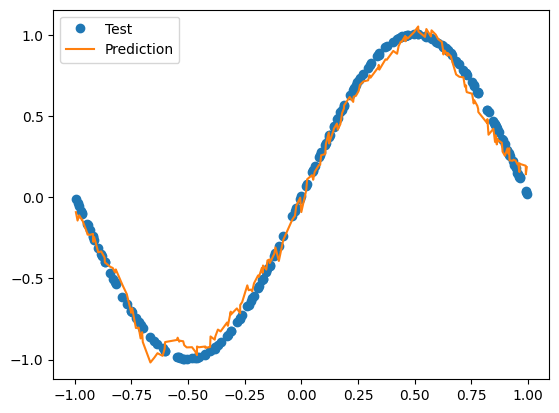

In [79]:
import matplotlib.pyplot as plt

plt.plot(x_test, y_test, "o", label="Test")
plt.plot(
    np.sort(np.array(x_test).flatten()),
    np.array(y_pred)[np.argsort(np.array(x_test).flatten())],
    label="Prediction",
)
plt.legend()
plt.show()

In [80]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred)

0.004244310632738012